In [181]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import dates as mpl_dates

In [182]:
#read-in the data
df = pd.read_excel("Superstore.xls")
df.head()

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Zip Code,State,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.250,38.94,...,60035,Illinois,Central,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,2,6,2012-02-20,Not Specified,2,6.9300,0.01,Regular Air,-4.640,2.08,...,98026,Washington,West,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",Kleencut® Forged Office Shears by Acme United ...,Small Pack,0.55,2012-02-21
2,3,32,2011-07-15,High,26,2808.0800,0.07,Regular Air,1054.820,107.53,...,98387,Washington,West,Corporate,Furniture,Office Furnishings,Tenex Contemporary Contur Chairmats for Low an...,Medium Box,0.65,2011-07-17
3,4,32,2011-07-15,High,24,1761.4000,0.09,Delivery Truck,-1748.560,70.89,...,98387,Washington,West,Corporate,Furniture,Tables,KI Conference Tables,Jumbo Box,0.72,2011-07-16
4,5,32,2011-07-15,High,23,160.2335,0.04,Regular Air,-85.129,7.99,...,98387,Washington,West,Corporate,Technology,Telephones and Communication,Bell Sonecor JB700 Caller ID,Medium Box,0.60,2011-07-17


In [183]:
#check for missing data
df_missing = df.isna()
#number of missing values per feature
missing_values = df_missing.sum()
print(missing_values)
#percentage of missing values per feature using mean
percent_missing = df_missing.mean()

Row ID                   0
Order ID                 0
Order Date               0
Order Priority           0
Order Quantity           0
Sales                    0
Discount                 0
Ship Mode                0
Profit                   0
Unit Price               0
Shipping Cost            0
Customer Name            0
City                     0
Zip Code                 0
State                    0
Region                   0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Name             0
Product Container        0
Product Base Margin     63
Ship Date                0
dtype: int64


In [184]:
#check inconsistency for each needed feature, same syntax for other features other than'Region'
inc_reg = df['Region'].value_counts(dropna=False)
print(inc_reg)
#drop missing values since they has very small impact
df = df.dropna(how='any')   
np.shape(df)

Central    2710
West       1956
East       1895
South      1838
Name: Region, dtype: int64


(8336, 23)

In [185]:
#Outliers and duplicated values:
#Ourliers and treat the outliers by removing
#q_low = df["Profit"].quantile(0.01)
q_hi  = df["Profit"].quantile(0.99)
df[df["Profit"] < q_hi]
df=df.drop(df['Profit'].idxmax())
#df_f = df[(df["Profit"] < q_hi) & (df["Profit"] > q_low)]
#Question (1):
#compute the discount in dollar amount for each transaction
df['Discount_Amount'] = df['Discount']*df['Sales']
#removing duplicated values:
df['Discount_Amount']=df['Discount_Amount'].drop_duplicates()
print(df['Discount_Amount'])
#compute profit in K: thousand
df['Profit (K)'] = df['Profit']/1000
#df['Profit (K)']

0        10.46160
1         0.06930
2       196.56560
3       158.52600
4         6.40934
          ...    
8394      4.37770
8395     41.18880
8396     35.62700
8397    662.38500
8398    348.80608
Name: Discount_Amount, Length: 8335, dtype: float64


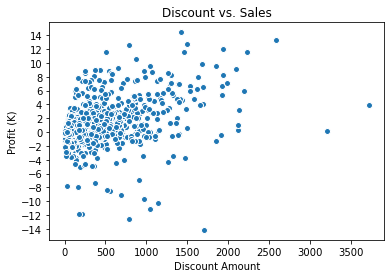

In [186]:
#create a scatter plot of profit and discount amount
plt.scatter('Discount_Amount','Profit (K)', data=df, edgecolors="w")
#create title and axis
plt.title('Discount vs. Sales')
plt.xlabel('Discount Amount')
plt.ylabel('Profit (K)')
plt.yticks(np.arange(-14, 16, 2))
plt.savefig('Figure 1.pdf', format='pdf',dpi=150)  # saving the plot into a pdf

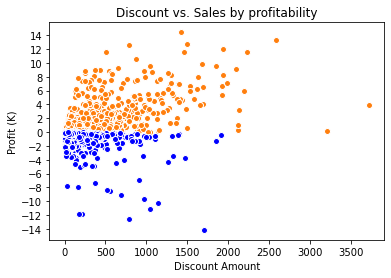

In [187]:
#Question (2):
#create a scatter plot of profit and discount amount by profitability
#profitable transactions in an orange color
plt.scatter('Discount_Amount','Profit (K)', data=df[(df['Profit (K)']>0)], c="tab:orange", edgecolors="w")
#unprofitable transactions in a blue color
plt.scatter('Discount_Amount','Profit (K)', data=df[(df['Profit (K)']<=0)], c="b", edgecolors="w")
#create title and axis
plt.title('Discount vs. Sales by profitability')
plt.xlabel('Discount Amount')
plt.ylabel('Profit (K)')
plt.yticks(np.arange(-14, 16, 2))
plt.savefig('Figure 2.pdf', format='pdf',dpi=150)  # saving the plot into a pdf

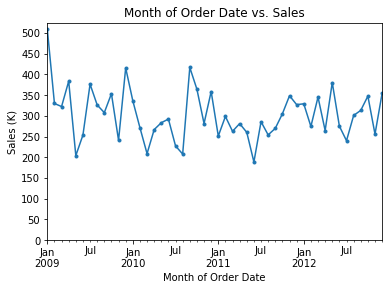

In [188]:
#Question (3):
#compute sales in K: thousand
df['Sales (K)'] = df['Sales']/1000
#df = df.sort_values('Order Date')
#print(df['Order Date'])
df['month_year'] = pd.to_datetime(df['Order Date']).dt.to_period('M')
#df['month_year'] = df['month_year'].dt.to_timestamp('s').dt.strftime('%m-%Y')
#create graph of Sales by the Order Date (Month/Year) 
sales_month_year = df['Sales (K)'].groupby(df['month_year']).sum().plot(style='.-',title='Month of Order Date vs. Sales')
#create title and axis
plt.xlabel('Month of Order Date')
plt.ylabel('Sales (K)')
plt.yticks(np.arange(0, 510, 50))
plt.savefig('Figure 3a.pdf', format='pdf',dpi=150)  # saving the plot into a pdf

/Users/anhnguyen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>


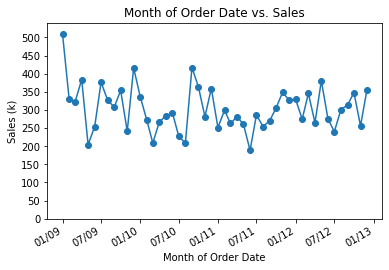

In [189]:
#2nd approach:
#divide by period of month
df['month_year'] = df['Order Date'].dt.to_period('M')
month_s = df.groupby(['month_year']).sum().reset_index()
month_s['Sales'] = month_s['Sales']/1000
month_s['month_year'] = month_s['month_year'].astype(str)
month_s['month_year'] = pd.to_datetime(month_s['month_year'])
# Setting up Plot space
fig = plt.figure() #Plotting
p03 = plt.plot_date(month_s['month_year'],month_s['Sales'], linestyle = 'solid')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%m/%y')
#create title and axis
plt.gca().xaxis.set_major_formatter(date_format)
plt.ylim([0, 540])
plt.locator_params(axis="y", nbins=11)
plt.locator_params(axis="x", nbins=12)
plt.title('Month of Order Date vs. Sales')
plt.xlabel('Month of Order Date')
plt.ylabel('Sales (k)')
plt.savefig('Figure 3b.pdf', format='pdf',dpi=150)  # saving the plot into a pdf

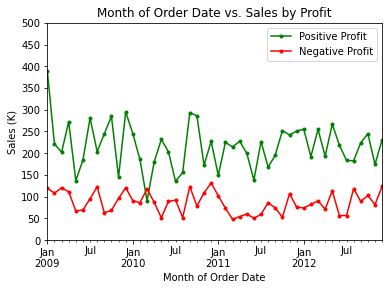

In [190]:
#Question (4):
#create positive and negative Profit
posprof = df[(df['Profit (K)']>0)]
negprof = df[(df['Profit (K)']<=0)]
#green color: profitable Sales (positive profit) per month
sale_month_year = posprof['Sales (K)'].groupby(posprof['month_year']).sum().plot(style='.-',c='g')
#red color: unprofitable Sales (negative profit) per month
sale_month_year = negprof['Sales (K)'].groupby(negprof['month_year']).sum().plot(style='.-',c='r')
sale_month_year.legend(['Positive Profit', 'Negative Profit'])
#create title and axis
sale_month_year.set_title('Month of Order Date vs. Sales by Profit')
plt.xlabel('Month of Order Date')
plt.ylabel('Sales (K)')
plt.yticks(np.arange(0, 510, 50))
plt.savefig('Figure 4a.pdf', format='pdf',dpi=150)  # saving the plot into a pdf

/Users/anhnguyen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>


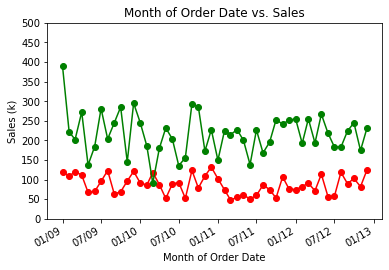

In [191]:
#2nd approach:
#create conditions
conditions = [(df['Profit (K)']<=0),(df['Profit (K)']>0)]
values = ['Negative Profit', 'Positive Profit']
df['Prof']=np.select(conditions, values)
#groupby
month_s_p = df.groupby(['month_year','Prof'], as_index=False).sum()
month_s_p['month_year'] = month_s_p['month_year'].astype(str)
month_s_p['month_year'] = pd.to_datetime(month_s_p['month_year'])
#calculate sales in K thousand
month_s_p['Sales'] = month_s_p['Sales']/1000
negprof=month_s_p.query("Prof=='Negative Profit'")
posprof=month_s_p.query("Prof=='Positive Profit'")
# Setting up plot
fig = plt.figure() #plotting
plt.plot_date(negprof['month_year'],negprof['Sales'], linestyle = 'solid', c='red')
plt.plot_date(posprof['month_year'],posprof['Sales'], linestyle = 'solid', c='green')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%m/%y')
#set up axis:
plt.gca().xaxis.set_major_formatter(date_format)
plt.ylim([0, 500])
plt.locator_params(axis="y", nbins=11)
plt.locator_params(axis="x", nbins=12)
plt.title('Month of Order Date vs. Sales')
plt.xlabel('Month of Order Date')
plt.ylabel('Sales (k)')
plt.savefig('Figure 4b.pdf', format='pdf',dpi=150)  # saving the plot into a pdf

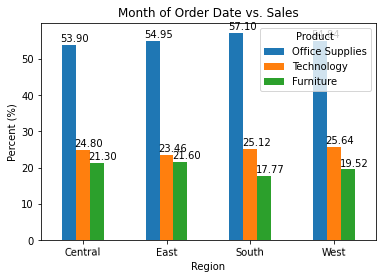

In [192]:
#Question (5):
x = pd.crosstab(df['Region'],df['Product Category']).apply(lambda x: x/x.sum()*100,axis=1)
#print(x)
product = ['Office Supplies', 'Technology', 'Furniture']
#reindex
x = x.reindex(product, axis="columns")
#create plot
ax=x.plot.bar(stacked = False, rot=1)
plt.legend(title='Product')
#create title and axis
plt.title('Month of Order Date vs. Sales')
plt.xlabel('Region')
plt.ylabel('Percent (%)')
x_offset = -0.1
y_offset = 0.9
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
plt.savefig('Figure 5.pdf', format='pdf',dpi=150)  # saving the plot into a pdf

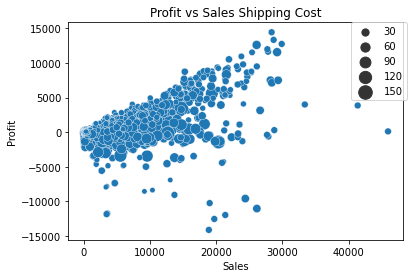

In [193]:
#Question (6):
# scatter plot with sns.scatter() function
# transparency with "alpha"
# bubble size with "s"
sns.scatterplot(x="Sales", 
                y="Profit",
                size="Shipping Cost",
                sizes=(20,200),
                data=df)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Profit vs Sales Shipping Cost")
plt.savefig('Figure 6a.pdf', format='pdf',dpi=150)  # saving the plot into a pdf

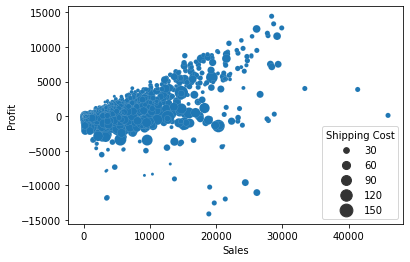

In [194]:
#2nd approach:
#using seaborn to graph scatterplot
sns.scatterplot(data= df, x="Sales", y="Profit", size="Shipping Cost", sizes=(0, 180))
plt.savefig('Figure 6b.pdf', format='pdf',dpi=150)  # saving the plot into a pdf

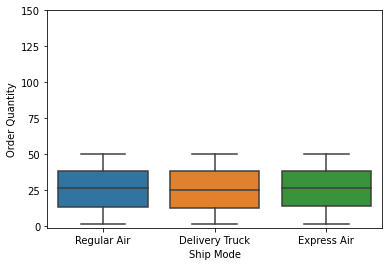

In [196]:
#Question (7):
#df['Order Quantity'].idxmax()
#using seaborn to graph boxplot
sns.boxplot(x="Ship Mode", y="Order Quantity", data=df, showfliers=True) #True means showing all outliers 
plt.yticks(np.arange(0, 151, 25))
plt.savefig('Figure 7.pdf', format='pdf',dpi=150)  # saving the plot into a pdf